In [1]:
import sys
import tensorflow as tf
import numpy as np

# MNIST 데이터 살펴보기

In [2]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


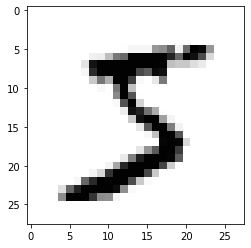

In [3]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [4]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


# MLP 구조 만들기
- MLP(Multi Layer Perceptron)의 입력 데이터는 기본적으로 벡터 형태입니다. X_train은 28 x 28 크기의 MNIST 데이터 60,000개가 모여 있는 배열이기 때문에, 각각의 데이터를 (28, 28) 크기의 행렬(2차원)에서 길이가 28x28=784인 벡터(1차원)로 변형시켜야 합니다. X_test에 포함된 데이터도 reshape() 함수를 사용하여 크기를 바꿔줍시다.

In [5]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [6]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* 이 값들을 분류 문제에 맞게 one-hot vector로 만들어줍시다. Y_train, Y_test의 shape을 다시 보면 길이가 10인 벡터 60,000개(test는 10,000개)가 묶인 형태로 바뀐 것을 확인할 수 있습니다.

In [7]:
# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [8]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Functional API로 MLP모델 만들기
- 이 경우에는 10개의 class를 분류 (multi-class classification)하는 것

In [9]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# Training
- verbose 매개변수는 fit() 함수의 학습 진행 상황을 출력할 때 사용됩니다. 이 매개변수는 세 가지 값 중 하나를 가질 수 있습니다:
    - verbose=0: 아무런 출력이 없습니다. 학습 과정이 완료될 때까지 아무것도 표시되지 않습니다.
    - verbose=1: 각 에포크마다 진행 상황이 출력됩니다. 예를 들어, 각 에포크의 진행률과 손실값이 출력됩니다.
    - verbose=2: 각 에포크마다 한 줄의 출력만 표시됩니다. 출력되는 내용은 verbose=1과 동일하지만, 더 간결하게 표시됩니다.

In [11]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 11s 12ms/step - loss: 15.2235 - categorical_accuracy: 0.7873 - val_loss: 1.2773 - val_categorical_accuracy: 0.9128
Epoch 2/30
48/48 [==============================] - 0s 5ms/step - loss: 0.7895 - categorical_accuracy: 0.9290 - val_loss: 0.7441 - val_categorical_accuracy: 0.9318
Epoch 3/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3887 - categorical_accuracy: 0.9517 - val_loss: 0.6076 - val_categorical_accuracy: 0.9393
Epoch 4/30
48/48 [==============================] - 0s 5ms/step - loss: 0.2097 - categorical_accuracy: 0.9677 - val_loss: 0.5344 - val_categorical_accuracy: 0.9422
Epoch 5/30
48/48 [==============================] - 0s 5ms/step - loss: 0.1159 - categorical_accuracy: 0.9776 - val_loss: 0.5038 - val_categorical_accuracy: 0.9454
Epoch 6/30
48/48 [==============================] - 0s 4ms/step - loss: 0.0625 - categorical_accuracy: 0.9871 - val_loss: 0.4883 - val_categorical_accuracy: 0.9484
Epoch 7/30
48

In [12]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[15.223467826843262, 0.7894594073295593, 0.3886896073818207, 0.20968064665794373, 0.11585560441017151, 0.06247717887163162, 0.03306591883301735, 0.017757853493094444, 0.010004248470067978, 0.0046004182659089565, 0.0026355639565736055, 0.0013971856096759439, 0.0008256344590336084, 0.0005847761640325189, 0.00048388875438831747, 0.0004053529119119048, 0.0003673324245028198, 0.00033206120133399963, 0.0003055288689211011, 0.0002831101301126182, 0.00026299883029423654, 0.0002464343560859561, 0.00023001567751634866, 0.00021728956198785454, 0.00020349863916635513, 0.00019292099750600755, 0.00018269238353241235, 0.00017297476006206125, 0.00016417460574302822, 0.0001564894919283688]


In [13]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
val_loss

[1.2772667407989502,
 0.7440851926803589,
 0.6076030731201172,
 0.5344198346138,
 0.5037960410118103,
 0.48827412724494934,
 0.47903361916542053,
 0.46683794260025024,
 0.46726474165916443,
 0.4566708207130432,
 0.4502889811992645,
 0.45215392112731934,
 0.4507962763309479,
 0.4499097466468811,
 0.44944554567337036,
 0.4502040147781372,
 0.4498695433139801,
 0.4498113989830017,
 0.44947656989097595,
 0.4492455720901489,
 0.4495501220226288,
 0.4497239887714386,
 0.44929012656211853,
 0.4490862488746643,
 0.44927719235420227,
 0.4491976797580719,
 0.44945597648620605,
 0.4489951431751251,
 0.44908764958381653,
 0.44911253452301025]

# 모델 성능 확인

In [14]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.4495 - categorical_accuracy: 0.9547

 Test Accuracy: 0.9547


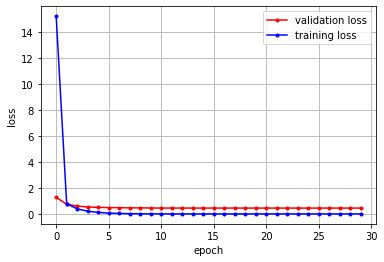

In [15]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---

# MLP 모델의 한계

## 원본 데이터를 변형해서 MLP 구조의 성능 테스트하기

In [16]:
# OpenCV 모듈 불러오기
import cv2

* OpenCV 라이브러리는 이미지 데이터를 다루는 데에 매우 효과적인 도구들을 갖추고 있는 모듈입니다.






In [17]:
# Q. 다시 한번 MNIST 데이터를 불러와 보세요.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

0


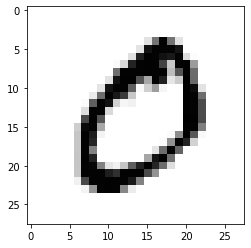

In [18]:
# Q. MNIST 데이터가 어떻게 생겼는지 확인해 봅시다. (이전 스텝을 참고해서 코드를 작성해 보세요.)
print(y_train[1])
plt.imshow(X_train[1], cmap='Greys')
plt.show()

## OpenCV의 함수들을 이용해서 MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용

- 선형 변환을 위해서 변환 매트릭스를 먼저 구하고, 이미지에 변환 매트릭스를 적용해 봅시다. 즉 원본 이미지에 선형 변환 매트릭스를 곱하여 원본 이미지를 변환하는 것입니다.

In [21]:
# 이미지 회전 변환 메트릭스 구하기 (getRotationMatrix2D((회전중심점 좌표), 회전각도, 스케일링 요소)
M = cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기 (이미지를 (3,3)만큼 이동시킨다)
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용 (warpAffine : 이미지에 변환행렬을 적용해, 실제로 이미지를 변환 (변환할 이미지, 적용할 변환행렬 M, 출력 이미지 크기))
test_image = cv2.warpAffine(X_train[1], M, (28, 28))  ## image에 matrix 곱

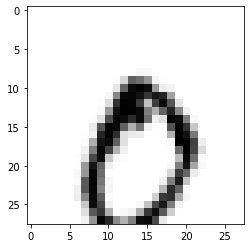

In [22]:
# 변환된 이미지
plt.imshow(test_image, cmap='Greys')

## 변환된 이미지도 잘 분류하는지 확인

In [23]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [24]:
Y_prediction = model.predict(test_image_reshape)

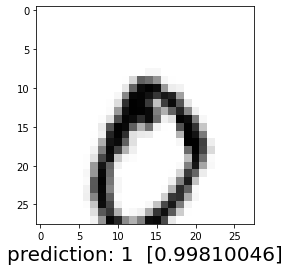

In [26]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

## 0인데 1로 분류했다. 오류가 생김